Your task is to take the k-means code here and see what happens when you change the value of k. What solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor. Keep in mind that it may be possible to have a solution with more than two clusters that is still better at tracking the real binary outcome – two of those clusters may map to "heart disease" while the other maps to "no heart disease," for example.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

Below thinkful imported and cleaned the data. They normalized it, calculated predicted values and plotted the solution. evaluating it with a cross tab.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

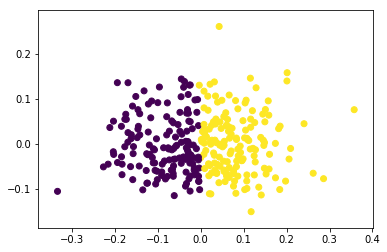

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


In [3]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [4]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0    0    1
row_0          
0      149   13
1        0  141


We will create a for loop containing nine K values in order to evaluate the effects of different values of K. We will evaluate it utilizing a cross tab and various statistical information from the cross tab data.

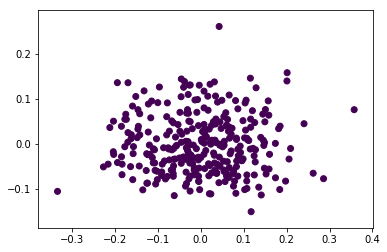

Comparing k-means clusters against the data:
col_0    0    1
row_0          
0      139  164 
No heart disease mean: 139.0 
No heart disease count: 139 
Heart disease mean: 164.0 
Heart disease count: 164


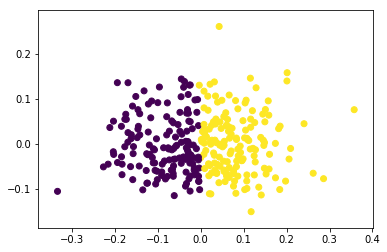

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99 
No heart disease mean: 69.5 
No heart disease count: 139 
Heart disease mean: 82.0 
Heart disease count: 164


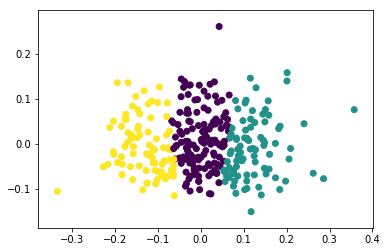

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      65  70
1      25  61
2      49  33 
No heart disease mean: 46.333333333333336 
No heart disease count: 139 
Heart disease mean: 54.666666666666664 
Heart disease count: 164


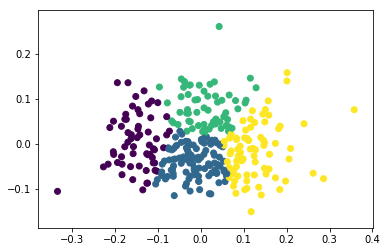

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      40  21
1      37  67
2      42  20
3      20  56 
No heart disease mean: 34.75 
No heart disease count: 139 
Heart disease mean: 41.0 
Heart disease count: 164


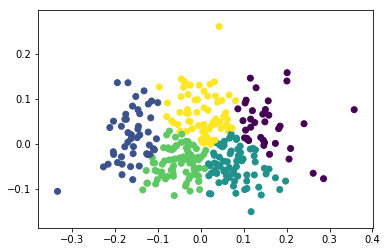

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      15  21
1      36  12
2      14  58
3      34  45
4      40  28 
No heart disease mean: 27.8 
No heart disease count: 139 
Heart disease mean: 32.8 
Heart disease count: 164


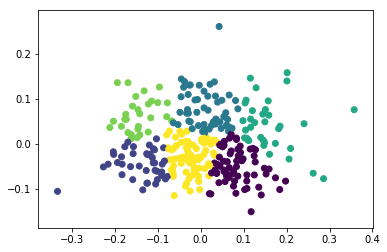

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      14  52
1      20  21
2      34  20
3      14  21
4      23   6
5      34  44 
No heart disease mean: 23.166666666666668 
No heart disease count: 139 
Heart disease mean: 27.333333333333332 
Heart disease count: 164


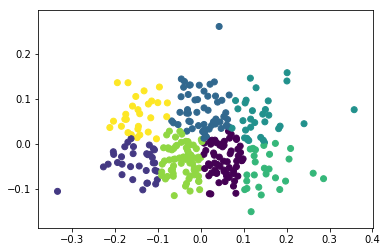

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      14  48
1      19  15
2      34  20
3      16  15
4       3  23
5      31  37
6      22   6 
No heart disease mean: 19.857142857142858 
No heart disease count: 139 
Heart disease mean: 23.428571428571427 
Heart disease count: 164


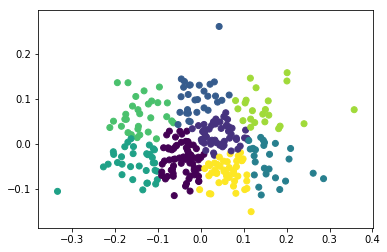

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      32  35
1      22  29
2      17  12
3       5  20
4      19  15
5      24   6
6      12  10
7       8  37 
No heart disease mean: 17.375 
No heart disease count: 139 
Heart disease mean: 20.5 
Heart disease count: 164


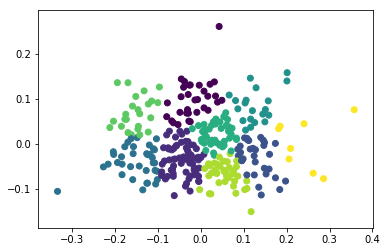

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      19  13
1      32  35
2       8  24
3      20  16
4      13   7
5      20  25
6      20   4
7       6  33
8       1   7 
No heart disease mean: 15.444444444444445 
No heart disease count: 139 
Heart disease mean: 18.22222222222222 
Heart disease count: 164


In [5]:


for x in np.arange(1, 10):
# Calculate predicted values.
    y_pred = KMeans(n_clusters=x, random_state=42).fit_predict(X_pca)

# Plot the solution.
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
    plt.show()

# Check the solution against the data.
    print('Comparing k-means clusters against the data:')
    ct = pd.crosstab(y_pred, y)
    print(ct, '\nNo heart disease mean:', ct[0].mean(), '\nNo heart disease count:', ct[0].sum(), '\nHeart disease mean:', ct[1].mean(), '\nHeart disease count:', ct[1].sum())

Changing the value of K creates more clusters. Having a K of 3 is the most compelling, because the data is closest and has the least amount of far outliers. Complexity does not become an issue in this data set as it predicts the same amount of non heart disease values and heart disease values across various K values.